In [1]:
import anndata as ad
import networkx as nx
import scanpy as sc
import os
print(os.getcwd())
path=os.getcwd()

/Users/meiqiliu/PycharmProjects/GLUE3/evaluation/workflow/scripts


In [2]:
os.chdir("/Users/meiqiliu/PycharmProjects/GLUE3/")

In [3]:
from scglue import *
from itertools import chain

In [4]:
rna = ad.read_h5ad(path+"/rna-pp-seq.h5ad")
atac = ad.read_h5ad(path+"/atac-pp-seq.h5ad")
guidance = nx.read_graphml(path+"/guidance-seq.graphml.gz")
# rna = ad.read_h5ad("rna-pp2.h5ad")
# atac = ad.read_h5ad("atac-pp2.h5ad")
# guidance = nx.read_graphml("guidance2.graphml.gz")
models.configure_dataset(
    rna, "NB", use_highly_variable=True,
    use_layer="counts", use_rep="X_pca"
)

models.configure_dataset(
    atac, "NB", use_highly_variable=True,
    use_rep="X_lsi"
)
guidance_hvf = guidance.subgraph(chain(
    rna.var.query("highly_variable").index,
    atac.var.query("highly_variable").index
)).copy()

glue = models.fit_SCGLUE(
    {"rna": rna, "atac": atac}, guidance_hvf,
    fit_kws={"directory": "glue"}
)

[INFO] fit_SCGLUE: Pretraining SCGLUE model...
encoder constructed
NB
encoder constructed
NB
[INFO] autodevice: Using CPU as computation device.
pretrain.fit---------------------
-------SCGlUEModel.fit------------
obsm AxisArrays with keys: X_pca, X_umap
rna data extract data (1000, 800)
obsm AxisArrays with keys: X_lsi
original atac before conversion AnnData object with n_obs × n_vars = 1000 × 1000
    obs: 'domain', 'cell_type'
    var: 'chrom', 'chromStart', 'chromEnd', 'highly_variable'
    uns: '__scglue__'
    obsm: 'X_lsi'
/var/folders/12/d54y_pk95zdbftjg_qkcj_c80000gq/T/tmp3fdce237
genome mm10 True
/Users/meiqiliu/PycharmProjects/GLUE3/experiments/Atlas/scripts/mm10.fa
True /Users/meiqiliu/PycharmProjects/GLUE3/experiments/Atlas/scripts/mm10.fa
running bedtools...
bedtools getfasta -fi /Users/meiqiliu/PycharmProjects/GLUE3/experiments/Atlas/scripts/mm10.fa -bed /var/folders/12/d54y_pk95zdbftjg_qkcj_c80000gq/T/tmp3fdce237 -fo /var/folders/12/d54y_pk95zdbftjg_qkcj_c80000gq/T/tmpm

[INFO] SCGLUETrainer: [Epoch 140] train={'g_nll': 0.159, 'g_kl': 0.195, 'g_elbo': 0.353, 'x_rna_nll': 0.207, 'x_rna_kl': 0.008, 'x_rna_elbo': 0.215, 'x_atac_nll': 0.043, 'x_atac_kl': 0.005, 'x_atac_elbo': 0.048, 'dsc_loss': 0.631, 'vae_loss': 0.278, 'gen_loss': 0.246}, val={'g_nll': 0.14, 'g_kl': 0.194, 'g_elbo': 0.334, 'x_rna_nll': 0.21, 'x_rna_kl': 0.008, 'x_rna_elbo': 0.218, 'x_atac_nll': 0.048, 'x_atac_kl': 0.011, 'x_atac_elbo': 0.059, 'dsc_loss': 0.774, 'vae_loss': 0.29, 'gen_loss': 0.251}, 4.2s elapsed
[INFO] SCGLUETrainer: [Epoch 150] train={'g_nll': 0.133, 'g_kl': 0.192, 'g_elbo': 0.325, 'x_rna_nll': 0.207, 'x_rna_kl': 0.008, 'x_rna_elbo': 0.215, 'x_atac_nll': 0.043, 'x_atac_kl': 0.004, 'x_atac_elbo': 0.047, 'dsc_loss': 0.62, 'vae_loss': 0.275, 'gen_loss': 0.244}, val={'g_nll': 0.14, 'g_kl': 0.192, 'g_elbo': 0.332, 'x_rna_nll': 0.205, 'x_rna_kl': 0.008, 'x_rna_elbo': 0.213, 'x_atac_nll': 0.046, 'x_atac_kl': 0.004, 'x_atac_elbo': 0.05, 'dsc_loss': 0.643, 'vae_loss': 0.276, 'gen_

[INFO] SCGLUETrainer: [Epoch 300] train={'g_nll': 0.145, 'g_kl': 0.121, 'g_elbo': 0.266, 'x_rna_nll': 0.206, 'x_rna_kl': 0.009, 'x_rna_elbo': 0.215, 'x_atac_nll': 0.044, 'x_atac_kl': 0.002, 'x_atac_elbo': 0.045, 'dsc_loss': 0.635, 'vae_loss': 0.271, 'gen_loss': 0.239}, val={'g_nll': 0.158, 'g_kl': 0.121, 'g_elbo': 0.279, 'x_rna_nll': 0.205, 'x_rna_kl': 0.008, 'x_rna_elbo': 0.213, 'x_atac_nll': 0.047, 'x_atac_kl': 0.002, 'x_atac_elbo': 0.049, 'dsc_loss': 0.638, 'vae_loss': 0.273, 'gen_loss': 0.241}, 4.2s elapsed
[INFO] SCGLUETrainer: [Epoch 310] train={'g_nll': 0.13, 'g_kl': 0.118, 'g_elbo': 0.248, 'x_rna_nll': 0.205, 'x_rna_kl': 0.009, 'x_rna_elbo': 0.213, 'x_atac_nll': 0.041, 'x_atac_kl': 0.002, 'x_atac_elbo': 0.043, 'dsc_loss': 0.635, 'vae_loss': 0.266, 'gen_loss': 0.234}, val={'g_nll': 0.144, 'g_kl': 0.119, 'g_elbo': 0.263, 'x_rna_nll': 0.205, 'x_rna_kl': 0.008, 'x_rna_elbo': 0.213, 'x_atac_nll': 0.044, 'x_atac_kl': 0.153, 'x_atac_elbo': 0.196, 'dsc_loss': 4.754, 'vae_loss': 0.42, '

Epoch 00455: reducing learning rate of group 0 to 2.0000e-04.
Epoch 00455: reducing learning rate of group 0 to 2.0000e-04.
[INFO] LRScheduler: Learning rate reduction: step 1
[INFO] SCGLUETrainer: [Epoch 460] train={'g_nll': 0.153, 'g_kl': 0.101, 'g_elbo': 0.255, 'x_rna_nll': 0.205, 'x_rna_kl': 0.009, 'x_rna_elbo': 0.214, 'x_atac_nll': 0.041, 'x_atac_kl': 0.0, 'x_atac_elbo': 0.041, 'dsc_loss': 0.642, 'vae_loss': 0.265, 'gen_loss': 0.233}, val={'g_nll': 0.135, 'g_kl': 0.101, 'g_elbo': 0.236, 'x_rna_nll': 0.215, 'x_rna_kl': 0.008, 'x_rna_elbo': 0.223, 'x_atac_nll': 0.048, 'x_atac_kl': 0.0, 'x_atac_elbo': 0.048, 'dsc_loss': 0.639, 'vae_loss': 0.281, 'gen_loss': 0.249}, 3.5s elapsed
[INFO] SCGLUETrainer: [Epoch 470] train={'g_nll': 0.12, 'g_kl': 0.101, 'g_elbo': 0.221, 'x_rna_nll': 0.204, 'x_rna_kl': 0.009, 'x_rna_elbo': 0.213, 'x_atac_nll': 0.042, 'x_atac_kl': 0.0, 'x_atac_elbo': 0.042, 'dsc_loss': 0.64, 'vae_loss': 0.263, 'gen_loss': 0.231}, val={'g_nll': 0.146, 'g_kl': 0.101, 'g_elbo':

[INFO] SCGLUETrainer: [Epoch 620] train={'g_nll': 0.121, 'g_kl': 0.101, 'g_elbo': 0.223, 'x_rna_nll': 0.206, 'x_rna_kl': 0.009, 'x_rna_elbo': 0.214, 'x_atac_nll': 0.043, 'x_atac_kl': 0.0, 'x_atac_elbo': 0.043, 'dsc_loss': 0.636, 'vae_loss': 0.266, 'gen_loss': 0.234}, val={'g_nll': 0.143, 'g_kl': 0.101, 'g_elbo': 0.244, 'x_rna_nll': 0.199, 'x_rna_kl': 0.008, 'x_rna_elbo': 0.207, 'x_atac_nll': 0.045, 'x_atac_kl': 0.0, 'x_atac_elbo': 0.045, 'dsc_loss': 0.642, 'vae_loss': 0.262, 'gen_loss': 0.23}, 3.6s elapsed
[INFO] SCGLUETrainer: [Epoch 630] train={'g_nll': 0.13, 'g_kl': 0.101, 'g_elbo': 0.231, 'x_rna_nll': 0.201, 'x_rna_kl': 0.009, 'x_rna_elbo': 0.21, 'x_atac_nll': 0.042, 'x_atac_kl': 0.0, 'x_atac_elbo': 0.042, 'dsc_loss': 0.635, 'vae_loss': 0.262, 'gen_loss': 0.23}, val={'g_nll': 0.129, 'g_kl': 0.101, 'g_elbo': 0.23, 'x_rna_nll': 0.202, 'x_rna_kl': 0.009, 'x_rna_elbo': 0.211, 'x_atac_nll': 0.048, 'x_atac_kl': 0.0, 'x_atac_elbo': 0.048, 'dsc_loss': 0.629, 'vae_loss': 0.268, 'gen_loss': 

2023-10-10 15:08:15,741 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "700"...
[INFO] EarlyStopping: Restoring checkpoint "700"...
[INFO] fit_SCGLUE: Estimating balancing weight...
pretrain.encode_data
encode_data
test [100000]
dataset <scglue.models.data.AnnDataset object at 0x2bff1c340>
dataloader <scglue.models.data.DataLoader object at 0x2bff2cd30>
x tensor([], size=(128, 0)) <built-in method size of Tensor object at 0x2c1a0f950>
xrep tensor([[ 3.4848e+00,  1.1419e+01,  9.0474e+00,  ..., -5.3637e+00,
          1.6020e-01, -1.2030e+00],
        [ 1.9448e-01, -4.5760e-01,  1.2121e+00,  ...,  7.5708e-02,
         -1.0075e-02, -4.6372e-02],
        [-1.4876e+00, -2.0016e+00,  1.0567e+00,  ..., -2.0453e-01,
          2.3667e-01, -3.0250e-01],
        ...,
        [-1.8596e+00, -1.6021e+00,  7.4495e-02,  ...,  1.5668e-01,
          7.0951e-01,  2.2482e-01],
        [ 4.1313e-02,  6.0275e+00, -8.8975e+00,  ...,  2.0964e-01,
          9.8265e-01,  1.3716e-01],
        [-1.6530e+00, -1.8995e+00, -1.0257e+00,  ..., -2

convert sequence (1000, 4, 1000)
atac data (1000, 4, 1000)
dataset <scglue.models.data.AnnDataset object at 0x2bd30f190>
dataloader <scglue.models.data.DataLoader object at 0x2bdf138b0>
x tensor([[[0.2500, 0.2500, 0.2500,  ..., 1.0000, 1.0000, 1.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.2500, 0.2500, 0.2500,  ..., 0.0000, 1.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 1.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 1.0000]],

        [[0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 1.0000],
         [0.2500, 0.2500, 0.2500,  ..., 1.0000, 1.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000]],

        ...,

        [[0.

[INFO] estimate_balancing_weight: Clustering cells...


RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

[INFO] estimate_balancing_weight: Matching clusters...
[INFO] estimate_balancing_weight: Matching array shape = (16, 18)...
[INFO] estimate_balancing_weight: Estimating balancing weight...
balancing [0.         0.         0.         0.00131201 0.         0.
 0.         0.         0.00131201 0.         0.00131201 0.
 0.         0.         0.00131201 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00100952 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00131201 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00100952 0.         0.         0.00131201
 0.         0.         0.00100952 0.         0.         0.00100952
 0.         0.         0.00131201 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00131201 0.    

balancing [0.         0.         0.         0.         0.         0.
 0.00211161 0.00211161 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00211161 0.         0.         0.00211161 0.
 0.         0.         0.         0.         0.         0.
 0.         0.00211161 0.         0.         0.         0.
 0.         0.         0.         0.00211161 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00211161 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00211161 0.         0.         0.         0.
 0.         0.         0.         0.         0

encoder constructed
NB
encoder constructed
NB
-------SCGlUEModel.fit------------
obsm AxisArrays with keys: X_pca, X_umap
rna data extract data (1000, 800)
obsm AxisArrays with keys: X_lsi
original atac before conversion AnnData object with n_obs × n_vars = 1000 × 1000
    obs: 'domain', 'cell_type', 'balancing_weight'
    var: 'chrom', 'chromStart', 'chromEnd', 'highly_variable'
    uns: '__scglue__'
    obsm: 'X_lsi'
/var/folders/12/d54y_pk95zdbftjg_qkcj_c80000gq/T/tmpee2itlxy
genome mm10 True
/Users/meiqiliu/PycharmProjects/GLUE3/experiments/Atlas/scripts/mm10.fa
True /Users/meiqiliu/PycharmProjects/GLUE3/experiments/Atlas/scripts/mm10.fa
running bedtools...
bedtools getfasta -fi /Users/meiqiliu/PycharmProjects/GLUE3/experiments/Atlas/scripts/mm10.fa -bed /var/folders/12/d54y_pk95zdbftjg_qkcj_c80000gq/T/tmpee2itlxy -fo /var/folders/12/d54y_pk95zdbftjg_qkcj_c80000gq/T/tmpmyag4dfa
length of seq2: 1000
convert sequence (1000, 4, 1000)
atac data (1000, 4, 1000)
[INFO] check_graph: Check

[INFO] SCGLUETrainer: [Epoch 150] train={'g_nll': 0.138, 'g_kl': 0.081, 'g_elbo': 0.219, 'x_rna_nll': 0.202, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.208, 'x_atac_nll': 0.042, 'x_atac_kl': 0.002, 'x_atac_elbo': 0.043, 'dsc_loss': 0.696, 'vae_loss': 0.26, 'gen_loss': 0.225}, val={'g_nll': 0.138, 'g_kl': 0.081, 'g_elbo': 0.219, 'x_rna_nll': 0.212, 'x_rna_kl': 0.007, 'x_rna_elbo': 0.219, 'x_atac_nll': 0.039, 'x_atac_kl': 0.002, 'x_atac_elbo': 0.041, 'dsc_loss': 0.738, 'vae_loss': 0.269, 'gen_loss': 0.232}, 3.3s elapsed
[INFO] SCGLUETrainer: [Epoch 160] train={'g_nll': 0.137, 'g_kl': 0.08, 'g_elbo': 0.217, 'x_rna_nll': 0.202, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.208, 'x_atac_nll': 0.042, 'x_atac_kl': 0.002, 'x_atac_elbo': 0.044, 'dsc_loss': 0.711, 'vae_loss': 0.261, 'gen_loss': 0.225}, val={'g_nll': 0.142, 'g_kl': 0.08, 'g_elbo': 0.222, 'x_rna_nll': 0.212, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.218, 'x_atac_nll': 0.038, 'x_atac_kl': 0.002, 'x_atac_elbo': 0.04, 'dsc_loss': 0.698, 'vae_loss': 0.267, 'ge

[INFO] SCGLUETrainer: [Epoch 310] train={'g_nll': 0.14, 'g_kl': 0.078, 'g_elbo': 0.218, 'x_rna_nll': 0.203, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.209, 'x_atac_nll': 0.045, 'x_atac_kl': 0.002, 'x_atac_elbo': 0.047, 'dsc_loss': 0.676, 'vae_loss': 0.265, 'gen_loss': 0.232}, val={'g_nll': 0.118, 'g_kl': 0.078, 'g_elbo': 0.196, 'x_rna_nll': 0.212, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.218, 'x_atac_nll': 0.04, 'x_atac_kl': 0.003, 'x_atac_elbo': 0.042, 'dsc_loss': 0.83, 'vae_loss': 0.269, 'gen_loss': 0.227}, 3.2s elapsed
[INFO] SCGLUETrainer: [Epoch 320] train={'g_nll': 0.122, 'g_kl': 0.078, 'g_elbo': 0.2, 'x_rna_nll': 0.201, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.207, 'x_atac_nll': 0.042, 'x_atac_kl': 0.002, 'x_atac_elbo': 0.044, 'dsc_loss': 0.648, 'vae_loss': 0.259, 'gen_loss': 0.227}, val={'g_nll': 0.128, 'g_kl': 0.077, 'g_elbo': 0.206, 'x_rna_nll': 0.21, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.217, 'x_atac_nll': 0.049, 'x_atac_kl': 0.002, 'x_atac_elbo': 0.051, 'dsc_loss': 0.685, 'vae_loss': 0.276, 'gen_

[INFO] SCGLUETrainer: [Epoch 470] train={'g_nll': 0.132, 'g_kl': 0.075, 'g_elbo': 0.208, 'x_rna_nll': 0.199, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.206, 'x_atac_nll': 0.042, 'x_atac_kl': 0.0, 'x_atac_elbo': 0.042, 'dsc_loss': 0.697, 'vae_loss': 0.256, 'gen_loss': 0.221}, val={'g_nll': 0.141, 'g_kl': 0.075, 'g_elbo': 0.217, 'x_rna_nll': 0.198, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.204, 'x_atac_nll': 0.045, 'x_atac_kl': 0.0, 'x_atac_elbo': 0.045, 'dsc_loss': 0.809, 'vae_loss': 0.258, 'gen_loss': 0.218}, 3.2s elapsed
[INFO] SCGLUETrainer: [Epoch 480] train={'g_nll': 0.139, 'g_kl': 0.075, 'g_elbo': 0.214, 'x_rna_nll': 0.199, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.206, 'x_atac_nll': 0.042, 'x_atac_kl': 0.0, 'x_atac_elbo': 0.042, 'dsc_loss': 0.726, 'vae_loss': 0.256, 'gen_loss': 0.22}, val={'g_nll': 0.139, 'g_kl': 0.075, 'g_elbo': 0.214, 'x_rna_nll': 0.215, 'x_rna_kl': 0.006, 'x_rna_elbo': 0.221, 'x_atac_nll': 0.046, 'x_atac_kl': 0.0, 'x_atac_elbo': 0.046, 'dsc_loss': 0.714, 'vae_loss': 0.275, 'gen_los

2023-10-10 15:41:43,155 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "471"...
[INFO] EarlyStopping: Restoring checkpoint "471"...


In [5]:
rna.obsm["X_glue"] = glue.encode_data("rna", rna)
atac.obsm["X_glue"] = glue.encode_data("atac", atac)

encode_data
test [100000]
dataset <scglue.models.data.AnnDataset object at 0x2a88ff1f0>
dataloader <scglue.models.data.DataLoader object at 0x112df70a0>
x tensor([], size=(128, 0)) <built-in method size of Tensor object at 0x2c15fd7c0>
xrep tensor([[ 3.4848e+00,  1.1419e+01,  9.0474e+00,  ..., -5.3637e+00,
          1.6020e-01, -1.2030e+00],
        [ 1.9448e-01, -4.5760e-01,  1.2121e+00,  ...,  7.5708e-02,
         -1.0075e-02, -4.6372e-02],
        [-1.4876e+00, -2.0016e+00,  1.0567e+00,  ..., -2.0453e-01,
          2.3667e-01, -3.0250e-01],
        ...,
        [-1.8596e+00, -1.6021e+00,  7.4495e-02,  ...,  1.5668e-01,
          7.0951e-01,  2.2482e-01],
        [ 4.1313e-02,  6.0275e+00, -8.8975e+00,  ...,  2.0964e-01,
          9.8265e-01,  1.3716e-01],
        [-1.6530e+00, -1.8995e+00, -1.0257e+00,  ..., -2.0632e-01,
         -4.8326e-01,  8.0901e-01]]) torch.Size([128, 100])
encoder
x tensor([], size=(128, 0)) <built-in method size of Tensor object at 0x2c1ae7310>
xrep tensor([

convert sequence (1000, 4, 1000)
atac data (1000, 4, 1000)
dataset <scglue.models.data.AnnDataset object at 0x2c06cce50>
dataloader <scglue.models.data.DataLoader object at 0x2bcd50250>
x tensor([[[0.2500, 0.2500, 0.2500,  ..., 1.0000, 1.0000, 1.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.2500, 0.2500, 0.2500,  ..., 0.0000, 1.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 1.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 1.0000]],

        [[0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 1.0000],
         [0.2500, 0.2500, 0.2500,  ..., 1.0000, 1.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000]],

        ...,

        [[0.

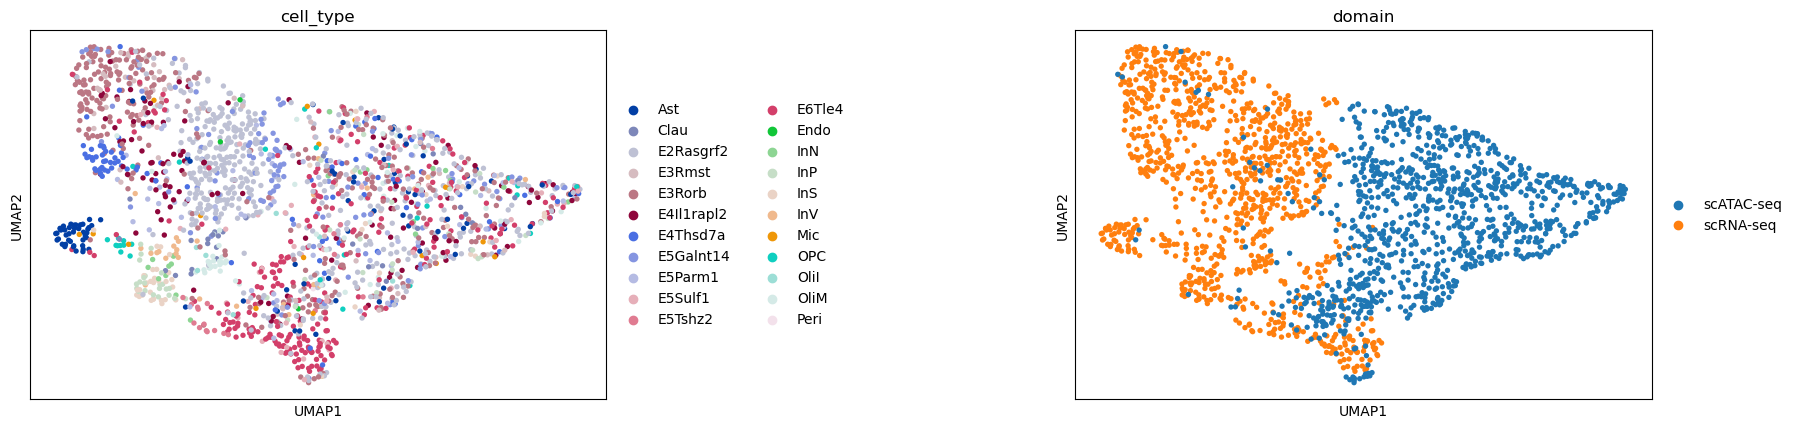

In [6]:
combined = ad.concat([rna, atac])
sc.pp.neighbors(combined, use_rep="X_glue", metric="cosine")#need embedding here 
sc.tl.umap(combined)
sc.pl.umap(combined, color=["cell_type", "domain"], wspace=0.65)

In [7]:
dx = models.integration_consistency(
    glue, {"rna": rna, "atac": atac}, guidance_hvf
)
dx

encode_data
test [100000]
dataset <scglue.models.data.AnnDataset object at 0x29b92f070>
dataloader <scglue.models.data.DataLoader object at 0x2bfd4feb0>
x tensor([], size=(128, 0)) <built-in method size of Tensor object at 0x2bd1b62c0>
xrep tensor([[ 3.4848e+00,  1.1419e+01,  9.0474e+00,  ..., -5.3637e+00,
          1.6020e-01, -1.2030e+00],
        [ 1.9448e-01, -4.5760e-01,  1.2121e+00,  ...,  7.5708e-02,
         -1.0075e-02, -4.6372e-02],
        [-1.4876e+00, -2.0016e+00,  1.0567e+00,  ..., -2.0453e-01,
          2.3667e-01, -3.0250e-01],
        ...,
        [-1.8596e+00, -1.6021e+00,  7.4495e-02,  ...,  1.5668e-01,
          7.0951e-01,  2.2482e-01],
        [ 4.1313e-02,  6.0275e+00, -8.8975e+00,  ...,  2.0964e-01,
          9.8265e-01,  1.3716e-01],
        [-1.6530e+00, -1.8995e+00, -1.0257e+00,  ..., -2.0632e-01,
         -4.8326e-01,  8.0901e-01]]) torch.Size([128, 100])
encoder
x tensor([], size=(128, 0)) <built-in method size of Tensor object at 0x2bd1b6ae0>
xrep tensor([

convert sequence (1000, 4, 1000)
atac data (1000, 4, 1000)
dataset <scglue.models.data.AnnDataset object at 0x2c056c520>
dataloader <scglue.models.data.DataLoader object at 0x2c0f5a250>
x tensor([[[0.2500, 0.2500, 0.2500,  ..., 1.0000, 1.0000, 1.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.2500, 0.2500, 0.2500,  ..., 0.0000, 1.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 1.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 1.0000]],

        [[0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 1.0000],
         [0.2500, 0.2500, 0.2500,  ..., 1.0000, 1.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000],
         [0.2500, 0.2500, 0.2500,  ..., 0.0000, 0.0000, 0.0000]],

        ...,

        [[0.

[INFO] integration_consistency: Using layer "counts" for modality "rna"
[INFO] integration_consistency: Selecting aggregation "sum" for modality "rna"
[INFO] integration_consistency: Selecting aggregation "sum" for modality "atac"
[INFO] integration_consistency: Selecting log-norm preprocessing for modality "rna"
[INFO] integration_consistency: Selecting log-norm preprocessing for modality "atac"
get_metacells
[INFO] get_metacells: Clustering metacells...


[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md
/Users/meiqiliu/miniforge3/envs/fa_base2/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 1 common metacells...
get_metacells
[INFO] get_metacells: Clustering metacells...


/Users/meiqiliu/PycharmProjects/GLUE3/scglue/data.py:635: RuntimeWarning: invalid value encountered in double_scalars
  ((X[s] * X[t]).mean() - mean[s] * mean[t]) / (std[s] * std[t])
[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md
/Users/meiqiliu/miniforge3/envs/fa_base2/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 1 common metacells...
get_metacells
[INFO] get_metacells: Clustering metacells...


/Users/meiqiliu/PycharmProjects/GLUE3/scglue/data.py:635: RuntimeWarning: invalid value encountered in double_scalars
  ((X[s] * X[t]).mean() - mean[s] * mean[t]) / (std[s] * std[t])
[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md
/Users/meiqiliu/miniforge3/envs/fa_base2/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 1 common metacells...
get_metacells
[INFO] get_metacells: Clustering metacells...


/Users/meiqiliu/PycharmProjects/GLUE3/scglue/data.py:635: RuntimeWarning: invalid value encountered in double_scalars
  ((X[s] * X[t]).mean() - mean[s] * mean[t]) / (std[s] * std[t])
[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md
/Users/meiqiliu/miniforge3/envs/fa_base2/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 1 common metacells...
get_metacells
[INFO] get_metacells: Clustering metacells...


/Users/meiqiliu/PycharmProjects/GLUE3/scglue/data.py:635: RuntimeWarning: invalid value encountered in double_scalars
  ((X[s] * X[t]).mean() - mean[s] * mean[t]) / (std[s] * std[t])
[WARNING] get_metacells: `faiss` is not installed, using `sklearn` instead... This might be slow with a large number of cells. Consider installing `faiss` following the guide from https://github.com/facebookresearch/faiss/blob/main/INSTALL.md
/Users/meiqiliu/miniforge3/envs/fa_base2/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[INFO] get_metacells: Aggregating metacells...
[INFO] metacell_corr: Computing correlation on 2 common metacells...


/Users/meiqiliu/PycharmProjects/GLUE3/scglue/data.py:635: RuntimeWarning: invalid value encountered in double_scalars
  ((X[s] * X[t]).mean() - mean[s] * mean[t]) / (std[s] * std[t])


,n_meta,consistency
0,10,0.000000
1,20,0.000000
2,50,0.000000
3,100,0.000000
4,200,0.169811


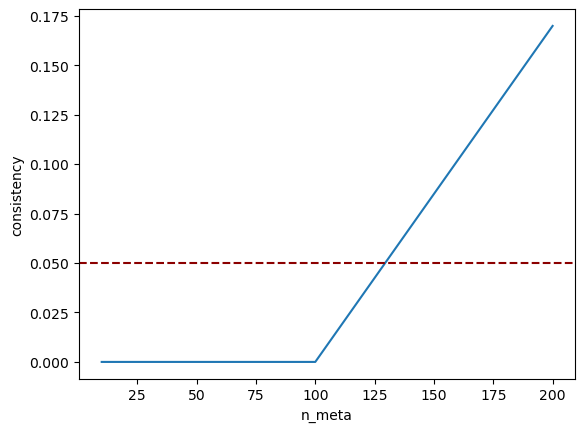

In [8]:
import seaborn as sns
sns.lineplot(x="n_meta", y="consistency", data=dx).axhline(y=0.05, c="darkred", ls="--")